## Load the data frame

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("modelling_challenge.csv")
df.head()

,player_id,play_measure3,skill6,play_measure6,skill3,equipment1,location3,location1,skill9,skill8,...,play_measure7,script2,trader,skill11,location4,quests2,gathering2,skill13,skill14,label
0,0,43.088820,0.000000,0.0,0.000000,0.869391,0.000000,0.000066,0.000000,0.015904,...,0.000020,0.002923,24.243813,0.0,0.000000,0.000000,0.000000,0.0,1,0
1,1,6.485932,19.754987,0.0,0.153287,1.527241,0.000000,0.022267,1.701927,0.000000,...,0.000378,0.003471,-0.154919,0.0,0.000047,0.006730,12.283297,0.0,1,0
2,2,217.967794,0.008938,0.0,0.018133,0.569748,0.000386,0.001080,0.008131,0.029036,...,0.040988,0.009967,4760.418024,0.0,0.000022,0.000067,0.095655,0.0,1,0
3,3,4.401437,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1,0
4,4,140.079290,1.413419,0.0,0.017494,0.969912,0.000990,0.006355,0.075989,0.540840,...,0.003883,0.017700,-1585.875502,0.0,0.000093,0.000400,0.152423,0.0,1,0


### Data preparation

In [ ]:
cohort0 = df[df["label"]== 0]
cohort0.shape

(22996, 34)

In [ ]:
cohort1 = df[df["label"] == 1]
cohort1.shape

(7436, 34)

Imbalanced

In [ ]:
df_noID = df.drop("player_id", axis="columns")
df_noID = df_noID.fillna(0)
df_noID.head()

,play_measure3,skill6,play_measure6,skill3,equipment1,location3,location1,skill9,skill8,social1,...,play_measure7,script2,trader,skill11,location4,quests2,gathering2,skill13,skill14,label
0,43.088820,0.000000,0.0,0.000000,0.869391,0.000000,0.000066,0.000000,0.015904,0.002611,...,0.000020,0.002923,24.243813,0.0,0.000000,0.000000,0.000000,0.0,1,0
1,6.485932,19.754987,0.0,0.153287,1.527241,0.000000,0.022267,1.701927,0.000000,0.000944,...,0.000378,0.003471,-0.154919,0.0,0.000047,0.006730,12.283297,0.0,1,0
2,217.967794,0.008938,0.0,0.018133,0.569748,0.000386,0.001080,0.008131,0.029036,0.000579,...,0.040988,0.009967,4760.418024,0.0,0.000022,0.000067,0.095655,0.0,1,0
3,4.401437,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1,0
4,140.079290,1.413419,0.0,0.017494,0.969912,0.000990,0.006355,0.075989,0.540840,0.003288,...,0.003883,0.017700,-1585.875502,0.0,0.000093,0.000400,0.152423,0.0,1,0


how to deal with NaN values?

In [ ]:
df_noID.groupby("label").mean()

,play_measure3,skill6,play_measure6,skill3,equipment1,location3,location1,skill9,skill8,social1,...,skill1,play_measure7,script2,trader,skill11,location4,quests2,gathering2,skill13,skill14
label,,,,,,,,,,,,,,,,,,,,,
0,37.156394,0.556664,0.006102,0.158902,0.637044,0.003143,0.004603,0.847616,0.444254,0.001052,...,0.833128,0.004415,0.006625,-474.684153,0.560215,0.000284,0.009674,8.339024,11.566696,1
1,18.575747,0.257312,0.002403,0.132890,0.654835,0.018614,0.005817,0.491574,0.325078,0.003206,...,0.698898,0.002560,0.004965,-241.859367,0.710949,0.000593,0.005462,4.856685,18.084106,1


From the above we can assume the following categories have the biggest impact on cohort and thus help to predict cohort:

- play_measure3

- skill6

- play_measure6? - are the values too low to consider? or determine it solely by the difference?

- location3

- skill9

- skill8?

- skill7

- play_measure4

- play_measure2

- skill4

- skill10

- skill12

- gathering1 - why is it negative numbers?, should I leave them like that?

- skill5

- trader

- gathering2

- skill13

<AxesSubplot: xlabel='play_measure3', ylabel='label'>

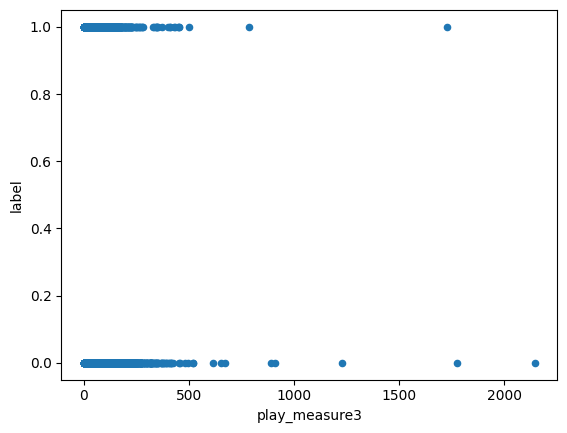

In [ ]:
df_noID.plot.scatter(x="play_measure3", y="label")

In [ ]:
variables = df_noID[["play_measure3","skill6", "play_measure6", "location3", "skill9", "skill8", "skill7", "play_measure4", "play_measure2", "skill4","skill10", "skill12", "gathering1", "skill5", "trader", "gathering2", "skill13"]]
variables.head() # X

,play_measure3,skill6,play_measure6,location3,skill9,skill8,skill7,play_measure4,play_measure2,skill4,skill10,skill12,gathering1,skill5,trader,gathering2,skill13
0,43.088820,0.000000,0.0,0.000000,0.000000,0.015904,0.000000,0.000000,0.0,0.006134,0.000000,0.000000,938.980137,0.000000,24.243813,0.000000,0.0
1,6.485932,19.754987,0.0,0.000000,1.701927,0.000000,0.030838,0.106353,0.0,0.001433,0.000000,0.000000,-0.546295,0.068509,-0.154919,12.283297,0.0
2,217.967794,0.008938,0.0,0.000386,0.008131,0.029036,1.713292,0.000000,0.0,0.000819,0.009210,0.009538,-9.042609,2.071442,4760.418024,0.095655,0.0
3,4.401437,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.487730,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,140.079290,1.413419,0.0,0.000990,0.075989,0.540840,0.021372,0.000000,0.0,0.000433,0.113378,0.016689,-335.194602,1.114146,-1585.875502,0.152423,0.0


In [ ]:
variables.shape

(30432, 17)

In [ ]:
cohort = df_noID["label"]
cohort.head() # Y

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [ ]:
cohort.shape

(30432,)

In [ ]:
from sklearn.model_selection import train_test_split
cohort_train, cohort_test, variables_train, variables_test = train_test_split(cohort,variables,train_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=4000)

In [ ]:
model.fit(variables_train, cohort_train)

LogisticRegression(max_iter=4000)

In [ ]:
model.predict(variables_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.score(variables_test,cohort_test)

0.7540252546589682

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d02cd21e-d2ae-4cbc-bbea-b863e71e91a2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>